In [166]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install xgboost

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Database dermatolgy
class_labels = { 1 : 'psoriasis', 
                 2 : 'seboreic dermatitis',
                 3 : 'lichen planus',
                 4 : 'pityriasis rosea',
                 5 : 'cronic dermatitis',
                 6 : 'pityriasis rubra pilaris' }

In [80]:
from collections import defaultdict

data = defaultdict(list)
with open('dermatology.data', 'r') as f:
    dataset = f.readlines()

for line in dataset:
    values = [np.NaN if value == '?' else int(value) for value in line.split(',')]
    
    data['erythema'].append(values[0])
    '''
    Symptoms
    -> Circular, red bumps on the soles, palms, arms, face and legs that grow into circles, may look like targets
    -> Itchiness, in some cases
    -> Painful sores or blisters on the lips, mouth, eyes and genitals
    -> Red patches with pale rings inside the patch with purple centers and small blisters called target lesions
    -> Fever, Joint pain
    Take values -> 0, 1, 2, 3
    '''
    
    data['scaling'].append(values[1])
    '''
    Symptoms
    -> Patches of dry skin typically appear on the elbows and lower legs 
    -> Flaky scalp
    -> Itchy skin
    -> Polygon-shaped scales on the skin
    -> Scales that are brown, gray, or white
    -> Dry skin
    Take values -> 0, 1, 2, 3
    '''
    
    data['definite borders'].append(values[2])
    '''
    Symptoms
    -> Iregular or jagged or wavy borders around affected area
    Take values -> 0, 1, 2, 3
    '''
    
    data['itching'].append(values[3])
    '''
    Symptoms
    ->  Irritating sensation that makes you want to scratch your skin
    ->  Sometimes it can feel like pain
    ->  Either in one area or all over body
    ->  May have a rash or hives
    Take values -> 0, 1, 2, 3
    '''
    
    data['koebner phenomenon'].append(values[4])
    '''
    Symptoms
    ->  Due toa a cut or a burn
    ->  Discoloration of the skin
    ->  Develop on parts of the body where the skin is irritated by a waistband or belt buckle
    Take values -> 0, 1, 2, 3
    '''
        
    data['polygonal papules'].append(values[5])
    '''
    Symptoms
    ->  Appears as small, flat-topped, red-to-purple bumps with round or irregular shape
    ->  Few small bumps or many
    ->  There are white scales or flakes on them
    Take values -> 0, 1, 2, 3
    '''
        
    data['follicular papules'].append(values[6])
    '''
    Symptoms
    ->  Clusters of small red bumps or white-headed pimples that develop around hair follicles
    ->  Pus-filled blisters that break open and crust over
    ->  Itchy and burning skin
    Take values -> 0, 1, 2, 3
    ''' 
        
    data['oral mucosal involvement'].append(values[7])
    '''
    Symptoms
    ->  Affect the inside of the lips, cheeks, gums, tongue, and throat
    ->  Diffuse lip
    ->  Patches on the top layer of skin.
    ->  Painful
    Take values -> 0, 1, 2, 3
    '''
    
    data['knee and elbow involvement'].append(values[8])
    '''
    Symptoms
    ->  Pain, swelling and stiffness because of joint inflammation
    ->  Itchy, painful red patches or a silvery white buildup of dead skin cells
    ->  Most commonly on the knees, elbows and scalp
    Take values -> 0, 1, 2, 3
    '''
    
    data['scalp involvement'].append(values[9])
    '''
    Symptoms
    ->  Itchy, scaly, red patches on the scalp, hairline and ears
    ->  Hair loss or Male pattern baldness
    ->  Presence of head lice
    Take values -> 0, 1, 2, 3
    '''
    
    data['family history'].append(values[10])
    '''
    ->  Any family history for skin diseases, Yes or No
    Take values -> 0, 1
    '''
    
    data['melanin incontinence'].append(values[11])
    '''
    Symptoms
    ->  
    Take values -> 0, 1, 2, 3
    '''
    
    data['eosinophils in the infiltrate'].append(values[12])
    '''
    Symptoms
    ->  Pain and swelling and inflammation of the skin 
    ->  Especially of the arms and legs
    Take values -> 0, 1, 2, 3
    '''
        
    data['PNL infiltrate'].append(values[13])
    '''
    Symptoms
    ->  Itchiness, redness of the skin and pimple-like eruptions
    ->  On areas exposed to sunlight
    ->  May last up to several months
    Take values -> 0, 1, 2, 3
    '''
        
    data['fibrosis of the papillary dermis'].append(values[14])
    '''
    Symptoms
    ->  Swelling and tightening of the skin
    ->  Thickening and hardening of the skin
    ->  Skin that may feel "woody" and develop an orange-peel appearance 
    ->  Darkening (excess pigmentation)
    Take values -> 0, 1, 2, 3
    '''
        
    data['exocytosis'].append(values[15])
    '''
    Symptoms
    ->  Inflammatory cells within epidermis  
    Take values -> 0, 1, 2, 3
    '''
    
    data['acanthosis'].append(values[16])
    '''
    Symptoms
    ->  Dark, thickened, velvety skin in body folds
    ->  Creases in your armpits, groin and back of the neck
    ->  Skin changes usually appear slowly
    ->  Affected skin may also have an odor or itch
    Take values -> 0, 1, 2, 3
    '''
    
    data['hyperkeratosis'].append(values[17])
    '''
    Symptoms
    ->  thick spots on the bottom of the foot and hands
    ->  Whitish areas inside the mouth
    ->  Thickened Skin
    ->  Blisters
    ->  Red, Scaly Patches
    ->  Thickened spots of skin on the toes or top of the foot, and can appear as dull, rounded bumps
    Take values -> 0, 1, 2, 3
    '''
    
    data['parakeratosis'].append(values[18])
    '''
    Symptoms
    ->  Brown or red, scaly solid elevation of skin with no visible fluid
    Take values -> 0, 1, 2, 3
    '''
    
    data['clubbing of the rete ridges'].append(values[19])
    '''
    Symptoms
    ->  
    Take values -> 0, 1, 2, 3
    '''
    
    data['elongation of the rete ridges'].append(values[20])
    '''
    Symptoms
    ->  A flattened brown pigmented spot on the skin  
    Take values -> 0, 1, 2, 3
    '''
    
    data['thinning of the suprapapillary epidermis'].append(values[21])
    '''
    Symptoms
    ->  
    Take values -> 0, 1, 2, 3
    '''
    
    data['spongiform pustule'].append(values[22])
    '''
    Symptoms
    ->  Small bumps on the skin that contain fluid or pus
    ->  Appear as white bumps surrounded by red skin
    ->  Any part of the body but they most commonly form on the back, chest, and face.
    Take values -> 0, 1, 2, 3
    '''
    
    data['munro microabscess'].append(values[23])
    '''
    Symptoms
    ->   
    Take values -> 0, 1, 2, 3
    '''
    
    data['focal hypergranulosis'].append(values[24])
    '''
    Symptoms
    ->  Skin becomes thicker than normal 
    Take values -> 0, 1, 2, 3
    '''
    
    data['disappearance of the granular layer'].append(values[25])
    '''
    Symptoms
    ->   
    Take values -> 0, 1, 2, 3
    '''
    
    data['vacuolisation and damage of basal layer'].append(values[26])
    '''
    Symptoms
    ->  
    Take values -> 0, 1, 2, 3
    '''
    
    data['spongiosis'].append(values[27])
    '''
    Symptoms
    ->  Scaly patches of irritated skin
    ->  Rashes in the shape of coins
    ->  Reddened skin
    ->  Dandruff that's difficult to get rid of
    ->  Oozing and infection after scratching an affected area
    Take values -> 0, 1, 2, 3
    '''
    
    data['saw-tooth appearance of retes'].append(values[28])
    '''
    Symptoms
    ->  
    Take values -> 0, 1, 2, 3
    '''
    
    data['follicular horn plug'].append(values[29])
    '''
    Symptoms
    ->  Rash
    Take values -> 0, 1, 2, 3
    '''
    
    data['perifollicular parakeratosis'].append(values[30])
    '''
    Symptoms
    ->  
    Take values -> 0, 1, 2, 3
    '''
    
    data['inflammatory monoluclear inflitrate'].append(values[31])
    '''
    Symptoms
    ->  White blood cells collect at the site of injury to help clear away the debris
    Take values -> 0, 1, 2, 3
    '''
    
    data['band-like infiltrate'].append(values[32])
    '''
    Symptoms
    ->  Inflammation at or near the insertion site with swollen, taut skin with pain
    ->  Patchy band like pattern
    Take values -> 0, 1, 2, 3
    '''
    
    data['age'].append(values[33])
    
    data['class label'].append(values[34])

In [81]:
df = pd.DataFrame(data, columns = data.keys())

In [84]:
df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class label
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [85]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [87]:
df['age'].describe()

count    358.000000
mean      36.296089
std       15.324557
min        0.000000
25%       25.000000
50%       35.000000
75%       49.750000
max       75.000000
Name: age, dtype: float64

In [88]:
# Replacing 0 and nan age with median age of the dataset
df['age'] = df['age'].replace(np.nan, df['age'].median())
df['age'] = df['age'].replace(0.0, df['age'].median())

In [89]:
df['age'].describe()

count    366.000000
mean      36.363388
std       15.037366
min        7.000000
25%       25.000000
50%       35.000000
75%       48.000000
max       75.000000
Name: age, dtype: float64

In [90]:
df['age'].isnull().sum()

0

## Model training and testing

1 - Support Vector Machines (SVM) - sklearn.svm.SVC

2 - Random Forest - sklearn.ensemble.RandomForestClassifier

3 - Naive Bayes - sklearn.naive_bayes.CategoricalNB

4 - Decision tree - sklearn.tree.DecisionTreeClassifier

5 - K-nearest neighbors (KNN) - sklearn.neighbors.KNeighborsClassifier

6 - Gradient boosting DT - sklearn.ensemble.GradientBoostingClassifier

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
X = df.drop('class label', axis=1)
y = df['class label'] # target value
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=1234)

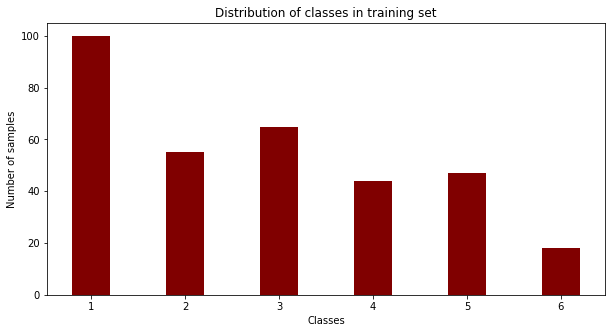

In [139]:
from collections import Counter 
data = Counter(list(y_train))

courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.4)
plt.xlabel("Classes")
plt.ylabel("Number of samples")
plt.title('Distribution of classes in training set')
plt.show()

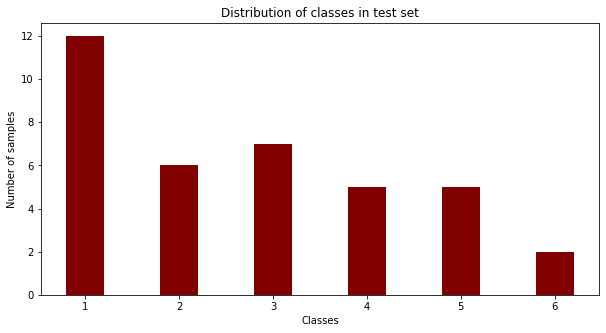

In [140]:
data = Counter(list(y_test))

courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.4)
plt.xlabel("Classes")
plt.ylabel("Number of samples")
plt.title('Distribution of classes in test set')
plt.show()

In [141]:
pipelines = {
    'svm':make_pipeline(SVC()),
    'rf':make_pipeline(RandomForestClassifier()),
    'cnb':make_pipeline(CategoricalNB()),
    'dt':make_pipeline(DecisionTreeClassifier()),
    'knn':make_pipeline(KNeighborsClassifier()),
    'gb':make_pipeline(GradientBoostingClassifier()),
}

In [142]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [143]:
fit_models

{'svm': Pipeline(steps=[('svc', SVC())]),
 'rf': Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())]),
 'cnb': Pipeline(steps=[('categoricalnb', CategoricalNB())]),
 'dt': Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier())]),
 'knn': Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier())]),
 'gb': Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier())])}

In [144]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, round(accuracy_score(y_test, yhat) * 100, 2), '%')

svm 72.97 %
rf 100.0 %
cnb 100.0 %
dt 94.59 %
knn 83.78 %
gb 100.0 %


In [155]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model):
    cm = metrics.confusion_matrix(y_test, model.predict(X_test))
    classes = class_labels.keys()

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.summer)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            xticklabels=classes, yticklabels=classes,
            title='Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')

    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="black")

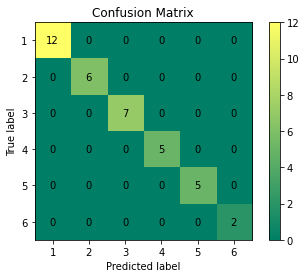

In [156]:
plot_confusion_matrix(fit_models['rf'])

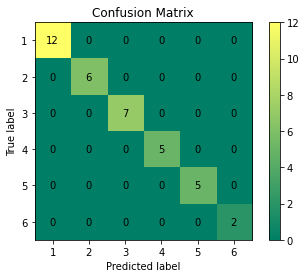

In [157]:
plot_confusion_matrix(fit_models['cnb'])

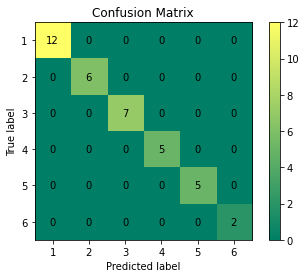

In [158]:
plot_confusion_matrix(fit_models['gb'])

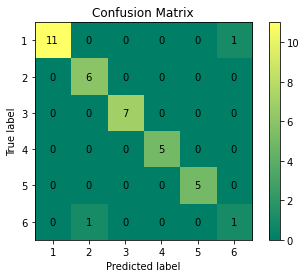

In [159]:
plot_confusion_matrix(fit_models['dt'])

7 - Multi-layered perceptron - sklearn.neural_network.MLPClassifier

In [160]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,)
             ]
        }
       ]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='accuracy')
clf.fit(X,y)

print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'identity', 'hidden_layer_sizes': (6,), 'solver': 'lbfgs'}


In [163]:
mlp = MLPClassifier(hidden_layer_sizes=(6,), activation='identity', solver='lbfgs')
mlp.fit(X_train, y_train)

yhat = mlp.predict(X_test)
print('mlp', round(accuracy_score(y_test, yhat) * 100, 2), '%')

mlp 97.3 %


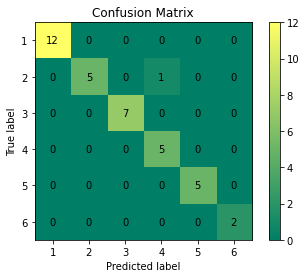

In [164]:
plot_confusion_matrix(mlp)

8 - XGBoost - from xgboost import XGBClassifier

In [168]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
yhat = model.predict(X_test)
print('xgb', round(accuracy_score(y_test, yhat) * 100, 2), '%')

[23:36:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb 100.0 %


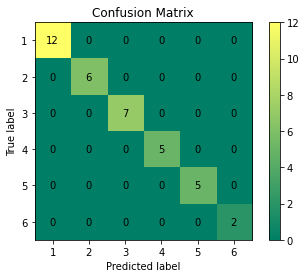

In [169]:
plot_confusion_matrix(xgb)